<a href="https://colab.research.google.com/github/GustavoPeetry/ColabsamplesUdemy/blob/master/Projeto_2_Classifica%C3%A7%C3%A3o_bin%C3%A1ria_breast_cancer_com_valida%C3%A7%C3%A3o_cruzada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 2: Classificação binária brest cancer com validação cruzada e dropout

## Etapa 1: Importação das bibliotecas

In [ ]:
!pip install skorch

     |████████████████████████████████| 112kB 2.8MB/s 


In [ ]:
import pandas as pd
import numpy as np
import torch.nn as nn        
from skorch import NeuralNetBinaryClassifier
import torch
import seaborn as sns
from sklearn.model_selection import cross_val_score
torch.__version__
#pip install torch==1.4.0

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


'1.4.0'

## Etapa 2: Base de dados

In [ ]:
np.random.seed(123)
torch.manual_seed(123)

In [ ]:
previsores = pd.read_csv('entradas_breast.csv')
classe = pd.read_csv('saidas_breast.csv')

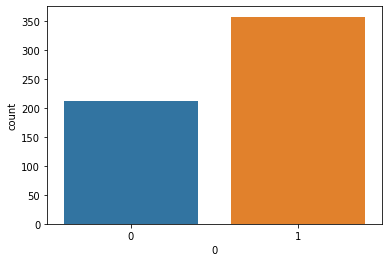

In [ ]:
sns.countplot(classe['0']);

In [ ]:
classe.shape

(569, 1)

In [ ]:
previsores = np.array(previsores, dtype='float32')
classe = np.array(classe, dtype='float32').squeeze(1)

In [ ]:
classe.shape

(569,)

In [ ]:
type(previsores)

numpy.ndarray

In [ ]:
type(classe)

numpy.ndarray

## Etapa 3: Classe para estrutura da rede neural

In [ ]:
class classificador_torch(nn.Module):
  def __init__(self):
    super().__init__()

    # 30 -> 16 -> 16 -> 1
    self.dense0 = nn.Linear(30, 16)
    torch.nn.init.uniform_(self.dense0.weight)
    self.activation0 = nn.ReLU()
    self.dense1 = nn.Linear(16, 16)
    torch.nn.init.uniform_(self.dense1.weight)
    self.activation1 = nn.ReLU()
    self.dense2 = nn.Linear(16, 1)
    torch.nn.init.uniform_(self.dense2.weight)
    self.output = nn.Sigmoid()

  def forward(self, X):
    X = self.dense0(X)
    X = self.activation0(X)
    X = self.dense1(X)
    X = self.activation1(X)
    X = self.dense2(X)
    X = self.output(X)
    return X

## Etapa 4: Skorch

In [ ]:
classificador_sklearn = NeuralNetBinaryClassifier(module=classificador_torch,
                                                  criterion=torch.nn.BCELoss,
                                                  optimizer=torch.optim.Adam,
                                                  lr=0.001,
                                                  optimizer__weight_decay=0.0001,
                                                  max_epochs=100,
                                                  batch_size=10,
                                                  train_split=False)

## Etapa 5: Validação cruzada

In [ ]:
resultados = cross_val_score(classificador_sklearn, previsores, classe, cv = 10, scoring = 'accuracy')

  epoch    train_loss     dur
-------  ------------  ------
      1       10.2537  0.3633
      2       10.2537  0.0792
      3       10.2537  0.0823
      4       10.2537  0.0780
      5       10.2537  0.0835
      6       10.2537  0.0789
      7       10.2537  0.0746
      8       10.2537  0.0753
      9       10.2537  0.0762
     10       10.2537  0.0750
     11       10.2537  0.0775
     12       10.2537  0.0793
     13       10.2537  0.0801
     14       10.2537  0.0800
     15       10.2537  0.0796
     16       10.2537  0.0785
     17       10.2537  0.0796
     18       10.2537  0.0790
     19       10.2537  0.0843
     20       10.2537  0.0940
     21       10.2537  0.0803
     22       10.2537  0.0791
     23       10.2537  0.0820
     24        4.7624  0.0765
     25        0.6025  0.0784
     26        0.5328  0.0786
     27        0.5051  0.0774
     28        0.4932  0.0743
     29        0.4834  0.0830
     30        0.4739  0.0869
     31        0.4641  0.0826
     32   

In [ ]:
resultados.shape

(10,)

In [ ]:
resultados

array([0.87719298, 0.8245614 , 0.87719298, 0.63157895, 0.85964912,
       0.92982456, 0.84210526, 0.92982456, 0.63157895, 0.625     ])

In [ ]:
media = resultados.mean()
media

0.8028508771929825

In [ ]:
desvio = resultados.std()
desvio

0.11782848003734125

## Etapa 6: Dropout

In [ ]:
class classificador_torch(nn.Module):
  def __init__(self):
    super().__init__()

    # 30 -> 16 -> 16 -> 1
    self.dense0 = nn.Linear(30, 16)
    torch.nn.init.uniform_(self.dense0.weight)
    self.activation0 = nn.ReLU()
    self.dropout0 = nn.Dropout(0.2)
    self.dense1 = nn.Linear(16, 16)
    torch.nn.init.uniform_(self.dense1.weight)
    self.activation1 = nn.ReLU()
    self.dropout1 = nn.Dropout(0.2)
    self.dense2 = nn.Linear(16, 1)
    torch.nn.init.uniform_(self.dense2.weight)
    self.output = nn.Sigmoid()

  def forward(self, X):
    X = self.dense0(X)
    X = self.activation0(X)
    X = self.dropout0(X)
    X = self.dense1(X)
    X = self.activation1(X)
    X = self.dropout1(X)
    X = self.dense2(X)
    X = self.output(X)
    return X

In [ ]:
classificador_sklearn = NeuralNetBinaryClassifier(module=classificador_torch,
                                                  criterion=torch.nn.BCELoss,
                                                  optimizer=torch.optim.Adam,
                                                  lr=0.001,
                                                  optimizer__weight_decay=0.0001,
                                                  max_epochs=100,
                                                  batch_size=10,
                                                  train_split=False)

In [ ]:
resultados = cross_val_score(classificador_sklearn, previsores, classe, cv = 10, scoring = 'accuracy')

  epoch    train_loss     dur
-------  ------------  ------
      1       10.2537  0.1199
      2       10.2537  0.0936
      3       10.2537  0.0832
      4       10.2537  0.0838
      5       10.2537  0.0836
      6       10.2537  0.0847
      7       10.2537  0.0838
      8       10.2537  0.0838
      9       10.2537  0.0874
     10       10.2537  0.0948
     11       10.2537  0.0843
     12       10.2537  0.0843
     13       10.2537  0.0845
     14       10.2537  0.0848
     15       10.2537  0.0824
     16       10.2537  0.0830
     17       10.2537  0.0844
     18       10.2537  0.0867
     19       10.2537  0.0895
     20       10.2537  0.0961
     21       10.2537  0.0886
     22       10.2537  0.0908
     23       10.2537  0.0916
     24       10.2537  0.0912
     25       10.2537  0.0891
     26       10.2537  0.0893
     27       10.2537  0.0895
     28       10.2537  0.0946
     29       10.2537  0.0921
     30        7.1957  0.0914
     31        0.6554  0.0936
     32   

In [ ]:
media = resultados.mean()
desvio = resultados.std()
media, desvio

(0.838408521303258, 0.1024364042134692)

In [ ]:
resultados

array([0.84210526, 0.85964912, 0.89473684, 0.92982456, 0.85964912,
       0.9122807 , 0.64912281, 0.9122807 , 0.63157895, 0.89285714])